In [211]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn import metrics

%matplotlib inline

In [195]:
def handle_one_hot(df,column,isDelete=True):
    '''
    进行one-hot编码
    df:要进行onehot编码的df
    column：onehot编码的列
    isDelete：编码后是否删除column
    '''
    if type(column).__name__ == "str":
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df,dummies],axis=1,sort=False)
        if isDelete:
            df.drop(columns=column,axis=1,inplace=True)
        return df
    elif type(column).__name__ == "list":
        for c in column:
            dummies = pd.get_dummies(df[c])
            df = pd.concat([df,dummies],axis=1,sort=False)
            if isDelete:
                df.drop(columns=c,axis=1,inplace=True)
        return df
    else:
        print("有误！")

def plot_corr_matrix(df):
    cor = df.corr()
    plt.subplots(figsize=(18, 18)) # 设置画面大小
    sbn.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")
        
def get_data():
    '''
    lgbm算法的数据集必须是：int，float，bool类型
    '''
    df = pd.read_csv("../dataset/bank_marketing_dataset/bank/bank-full.csv",sep=";")
    
    #print(df.info())
    
    #df.hist(figsize=(20,15))
    
    df = handle_one_hot(df,["job","marital","education","default","housing","loan","contact","month","poutcome"])
    
    df[df["y"] == "yes"] = 1
    df[df["y"] == "no"] = 0
    
    y = df["y"]
    X = df.drop("y",axis=1)
    
    return X,y

#get_data()

In [196]:
print("Loading Data ... ")
# 导入数据
train_x, train_y = get_data()
# 用sklearn.cross_validation进行训练数据集划分，这里训练集和交叉验证集比例为7：3，可以自己根据需要设置
X, val_X, y, val_y = train_test_split(
    train_x,
    train_y,
    test_size=0.3,
    random_state=1,
    stratify=train_y ## 这里保证分割后y的比例分布与原数据一致
)
X_train = X
y_train = y
X_test = val_X
y_test = val_y


Loading Data ... 


In [197]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 5,
    'max_depth': 6,
    'min_data_in_leaf': 450,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5,
    'lambda_l1': 1,  
    'lambda_l2': 0.001,  # 越小l2正则程度越高
    'min_gain_to_split': 0.2,
    'verbose': 5,
    'is_unbalance': True,
    'min_data':1
}

In [199]:
# train
print('Start training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

print('Start predicting...')

preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果

Start training...
[1]	valid_0's binary_logloss: 0.266932	valid_0's auc: 1
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.221444	valid_0's auc: 1
[3]	valid_0's binary_logloss: 0.189179	valid_0's auc: 1
[4]	valid_0's binary_logloss: 0.164072	valid_0's auc: 1
[5]	valid_0's binary_logloss: 0.143636	valid_0's auc: 1
[6]	valid_0's binary_logloss: 0.126553	valid_0's auc: 1
[7]	valid_0's binary_logloss: 0.112023	valid_0's auc: 1
[8]	valid_0's binary_logloss: 0.0995143	valid_0's auc: 1
[9]	valid_0's binary_logloss: 0.088648	valid_0's auc: 1
[10]	valid_0's binary_logloss: 0.0791446	valid_0's auc: 1
[11]	valid_0's binary_logloss: 0.0707891	valid_0's auc: 1
[12]	valid_0's binary_logloss: 0.0634117	valid_0's auc: 1
[13]	valid_0's binary_logloss: 0.0568755	valid_0's auc: 1
[14]	valid_0's binary_logloss: 0.0510683	valid_0's auc: 1
[15]	valid_0's binary_logloss: 0.0458965	valid_0's auc: 1
[16]	valid_0's binary_logloss: 0.0412814	valid_0's auc: 1
[17]	val

[170]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[171]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[172]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[173]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[174]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[175]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[176]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[177]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[178]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[179]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[180]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[181]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[182]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[183]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[184]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[185]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[186]	valid_0's binary_l

[308]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[309]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[310]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[311]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[312]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[313]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[314]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[315]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[316]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[317]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[318]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[319]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[320]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[321]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[322]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[323]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[324]	valid_0's binary_l

[462]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[463]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[464]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[465]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[466]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[467]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[468]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[469]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[470]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[471]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[472]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[473]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[474]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[475]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[476]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[477]	valid_0's binary_logloss: 4.25377e-05	valid_0's auc: 1
[478]	valid_0's binary_l

该lgbm分类器的准确率为：0.882999,auc值为：1.000000


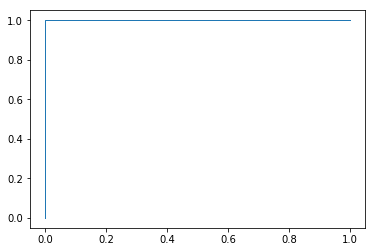

In [222]:
# 导出结果
threshold = 0.5
results = []
for pred in preds:
    if pred > threshold:
        results.append(1)
    else:
        results.append(0)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds,pos_label = 1)##指定正例标签，pos_label = ###########在数之联的时候学到的，要制定正例
roc_auc = metrics.auc(fpr,tpr)
#画出ROC曲线
plt.plot(fpr, tpr, lw=1, label='ROC  %s (area = %0.3f)' % (gbm, roc_auc)) 

test_acc = (results == y_test).astype("int").sum()/len(results)        
test_auc = metrics.roc_auc_score(y_test,preds)#验证集上的auc值

print("该lgbm分类器的准确率为：%f,auc值为：%f"%(test_acc,test_auc))

In [205]:
# 导出特征重要性
importance = gbm.feature_importance()
names = gbm.feature_name()
with open('./gbm_feature_importance.txt', 'w+') as file:
    for index, im in enumerate(importance):
        string = names[index] + ', ' + str(im) + '\n'
        file.write(string)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [127]:
df = pd.read_csv("../dataset/bank_marketing_dataset/bank/bank-full.csv",sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [128]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [129]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [131]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [132]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [133]:
df["housing"].unique()

array(['yes', 'no'], dtype=object)

In [134]:
df["loan"].unique()

array(['no', 'yes'], dtype=object)

贷款人数：7244
没有贷款的人数：37967


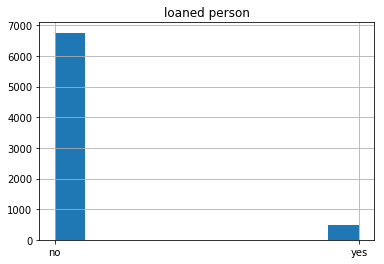

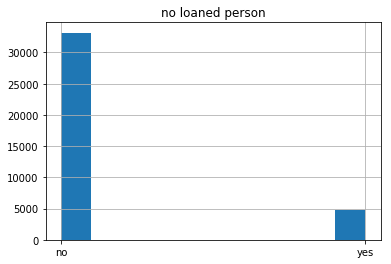

In [159]:
loaned_person = df[df["loan"]=="yes"] #贷过款的人
no_loaned_person = df[df["loan"]=="no"] #没有贷过款的人
print("贷款人数：%d"%loaned_person["loan"].count())
print("没有贷款的人数：%d"%no_loaned_person["loan"].count())

plt.title("loaned person")
loaned_person["y"].hist()
fig=plt.figure()
plt.title("no loaned person")
no_loaned_person["y"].hist()

In [160]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

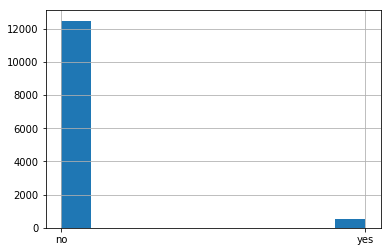

In [164]:
unknown_contact = df[df["contact"] == "unknown"]
unknown_contact["y"].hist()

In [161]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [165]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)